Start with the imports

In [2]:
#Importing the packages I will use
import pandas as pd #to work with dataframes
import numpy as np #to work with numpy arrays
import seaborn as sns #for visualizing
import matplotlib.pyplot as plt #for making plots
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import pickle
import re #regular expressions

In [3]:
data_c3=pd.read_csv('../data/raw/d3.csv')

Let's revisit the null values

In [4]:
missing = pd.concat([data_c3.isnull().sum(),100 * data_c3.isnull().mean()], axis=1)
missing.columns=['count','%']
print(missing.sort_values(by='count',ascending=False))

               count          %
size          288996  67.702760
cylinders     168231  39.411282
drive          98322  23.033782
condition      83314  19.517875
type           57203  13.400881
paint_color    51200  11.994565
manufacturer   12098   2.834185
title_status    6442   1.509160
model           5266   1.233660
odometer        4389   1.028206
fuel            2058   0.482125
transmission    1627   0.381155
year            1194   0.279717
posting_date      57   0.013353
price              0   0.000000
state              0   0.000000
region             0   0.000000


I want to join a secondary dataframe so that we can analyze the sections of the country such as west, east, south, etc.
I found a csv from the US census bureau

In [5]:
states = pd.read_csv('us census bureau regions and divisions.csv')
states

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


We need a column to join on, so let's do that now

In [6]:
states.rename(columns={"State Code":'state'},inplace=True)
states

,State,state,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


Let's do the merge. c4 for fourth cleaning and joining

In [9]:
data_c4=pd.read_csv('../data/raw/d3.csv')

In [10]:
data_c5=pd.merge(data_c4,states,how='outer')
data_c5

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,state,lat,long,posting_date,State,Region,Division
0,prescott,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,az,NaN,NaN,NaN,NaN,NaN,NaN
1,flagstaff / sedona,4850.0,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,...,full-size,mini-van,blue,az,34.727929,-112.015915,2021-05-04T09:40:28-0700,NaN,NaN,NaN
2,flagstaff / sedona,8000.0,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,...,NaN,NaN,white,az,35.185900,-111.662000,2021-05-04T08:06:03-0700,NaN,NaN,NaN
3,flagstaff / sedona,18990.0,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,...,NaN,hatchback,black,az,33.779214,-84.411811,2021-05-04T06:06:54-0700,NaN,NaN,NaN
4,flagstaff / sedona,32590.0,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,...,NaN,other,black,az,33.779214,-84.411811,2021-05-04T06:06:54-0700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VT,NaN,NaN,NaN,Vermont,Northeast,New England
426907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,WA,NaN,NaN,NaN,Washington,West,Pacific
426908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,WI,NaN,NaN,NaN,Wisconsin,Midwest,East North Central
426909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,WV,NaN,NaN,NaN,West Virginia,South,South Atlantic


something don't look right, aha, it looks like the states values are different capitalization

In [11]:
data_c4.state.unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [12]:
states.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [13]:
data_c4.state=data_c4.state.str.upper()
data_c4.state.unique()

array(['AZ', 'AR', 'FL', 'MA', 'NC', 'NY', 'OR', 'PA', 'TX', 'WA', 'WI',
       'AL', 'AK', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'HI', 'ID', 'IL',
       'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO',
       'MT', 'NE', 'NV', 'NJ', 'NM', 'NH', 'ND', 'OH', 'OK', 'RI', 'SC',
       'SD', 'TN', 'UT', 'VT', 'VA', 'WV', 'WY'], dtype=object)

In [14]:
data_c5=pd.merge(data_c4,states,how='outer')
data_c5.state.unique().shape

(51,)

Awesome, we have 51 unique states

In [15]:
data_c5.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,state,lat,long,posting_date,State,Region,Division
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AZ,NaN,NaN,NaN,Arizona,West,Mountain
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,...,full-size,mini-van,blue,AZ,34.727929,-112.015915,2021-05-04T09:40:28-0700,Arizona,West,Mountain
2,flagstaff / sedona,8000,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,...,NaN,NaN,white,AZ,35.185900,-111.662000,2021-05-04T08:06:03-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,...,NaN,hatchback,black,AZ,33.779214,-84.411811,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,...,NaN,other,black,AZ,33.779214,-84.411811,2021-05-04T06:06:54-0700,Arizona,West,Mountain


Let's rename the columns so they make more sense

In [16]:
data_c5.rename(columns={'region':'state_region','title_status':'title','paint_color':'color','State':'state','Region':'us_region','Division':'division'},inplace=True)
data_c5

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,...,size,type,color,state,lat,long,posting_date,state,us_region,division
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AZ,NaN,NaN,NaN,Arizona,West,Mountain
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,...,full-size,mini-van,blue,AZ,34.727929,-112.015915,2021-05-04T09:40:28-0700,Arizona,West,Mountain
2,flagstaff / sedona,8000,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,...,NaN,NaN,white,AZ,35.185900,-111.662000,2021-05-04T08:06:03-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,...,NaN,hatchback,black,AZ,33.779214,-84.411811,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,...,NaN,other,black,AZ,33.779214,-84.411811,2021-05-04T06:06:54-0700,Arizona,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,NaN,sedan,red,WY,33.786500,-84.445400,2021-04-04T03:21:31-0600,Wyoming,West,Mountain
426856,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,...,NaN,sedan,red,WY,33.786500,-84.445400,2021-04-04T03:21:29-0600,Wyoming,West,Mountain
426857,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,...,NaN,hatchback,white,WY,33.779214,-84.411811,2021-04-04T03:21:17-0600,Wyoming,West,Mountain
426858,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,NaN,sedan,silver,WY,33.786500,-84.445400,2021-04-04T03:21:11-0600,Wyoming,West,Mountain


In [17]:
df=data_c5

## Exploratory Data Analysis
Understand the relationship between data and features


In [18]:
df.sample(15)

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,...,size,type,color,state,lat,long,posting_date,state,us_region,division
77914,new york city,8900,2007.0,infiniti,2005 g35 coupe,excellent,6 cylinders,gas,98000.0,clean,...,NaN,sedan,blue,NY,40.697600,-73.704900,2021-05-01T12:01:44-0400,New York,Northeast,Middle Atlantic
89192,eugene,6400,2006.0,subaru,impreza wrx,good,4 cylinders,gas,177000.0,rebuilt,...,compact,wagon,grey,OR,43.920685,-123.018788,2021-05-03T11:31:29-0700,Oregon,West,Pacific
413437,vermont,10000,1979.0,jeep,NaN,good,8 cylinders,gas,100000.0,clean,...,NaN,NaN,orange,VT,43.802757,-73.275279,2021-04-16T11:22:40-0400,Vermont,Northeast,New England
141774,kennewick-pasco-richland,5990,2011.0,hyundai,elantra gls,excellent,4 cylinders,gas,158977.0,clean,...,NaN,NaN,silver,WA,46.207557,-119.117030,2021-04-22T07:17:52-0700,Washington,West,Pacific
247776,macon / warner robins,6500,1987.0,jeep,wrangler sport,good,6 cylinders,gas,134100.0,clean,...,NaN,offroad,brown,GA,32.892600,-83.745500,2021-04-15T21:24:17-0400,Georgia,South,South Atlantic
100282,salem,522,2017.0,ford,f-150,NaN,6 cylinders,gas,67657.0,clean,...,NaN,truck,silver,OR,44.973187,-123.018138,2021-04-22T08:03:14-0700,Oregon,West,Pacific
4062,phoenix,0,2020.0,cadillac,xt6,new,NaN,gas,4287.0,clean,...,mid-size,suv,white,AZ,33.639065,-112.245386,2021-05-02T05:03:17-0700,Arizona,West,Mountain
250113,hawaii,12891,2013.0,toyota,corolla,NaN,4 cylinders,gas,57043.0,clean,...,NaN,sedan,red,HI,21.296235,-157.859345,2021-05-02T13:34:34-1000,Hawaii,West,Pacific
271761,bloomington,10000,2015.0,dodge,charger,excellent,NaN,gas,50000.0,clean,...,NaN,NaN,NaN,IN,39.161160,-86.565674,2021-04-21T11:06:09-0400,Indiana,Midwest,East North Central
161938,northern WI,8650,2010.0,lincoln,mkt,new,6 cylinders,gas,163984.0,clean,...,mid-size,wagon,red,WI,44.405015,-88.811252,2021-04-26T18:42:55-0500,Wisconsin,Midwest,East North Central


In [19]:
df.columns

Index(['state_region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title', 'transmission', 'drive',
       'size', 'type', 'color', 'state', 'lat', 'long', 'posting_date',
       'state', 'us_region', 'division'],
      dtype='object')

Let's start by looking at features

Numerical Features:

In [20]:
df.price.sort_values()

229404             0
195328             0
195332             0
195334             0
291069             0
             ...    
187778    3009548743
356246    3024942282
241944    3024942282
404883    3736928711
91888     3736928711
Name: price, Length: 426860, dtype: int64

That is weird, the prices are a minimum of 0

In [21]:
print(df.price.describe())

count    4.268600e+05
mean     7.520162e+04
std      1.218257e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648000e+04
max      3.736929e+09
Name: price, dtype: float64


well, since we are trying to track the price....we should probably drop anything that is a zero, because it can't be sold for $0

In [22]:
df1=df[(df['price']!=0)]
df1.price.sort_values()

24615              1
405116             1
405117             1
35604              1
13259              1
             ...    
187778    3009548743
241944    3024942282
356246    3024942282
91888     3736928711
404883    3736928711
Name: price, Length: 393970, dtype: int64

uh oh, looks like there are 1 cars too, that ain't right, let's remove anything under 500

In [23]:
df2=df1[df1['price']>=500]

In [24]:
df2.price.sort_values()

376010           500
2519             500
107021           500
376637           500
235569           500
             ...    
187778    3009548743
356246    3024942282
241944    3024942282
404883    3736928711
91888     3736928711
Name: price, Length: 384772, dtype: int64

awesome, looks like the lowest price is 500

In [25]:
df2.odometer.sort_values()

129706    0.0
206845    0.0
3668      0.0
206841    0.0
206840    0.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 384772, dtype: float64

In [26]:
df2.describe()

,price,year,odometer,lat,long
count,3.847720e+05,383605.000000,3.826560e+05,381319.000000,381319.000000
mean,8.342275e+04,2010.969221,9.854854e+04,38.511863,-94.346162
std,1.283155e+07,9.611516,1.926768e+05,5.848917,18.095826
min,5.000000e+02,1900.000000,0.000000e+00,-84.122245,-159.719900
25%,7.800000e+03,2008.000000,3.817000e+04,34.677500,-110.960537
50%,1.590000e+04,2013.000000,8.768400e+04,39.222203,-88.033653
75%,2.799000e+04,2017.000000,1.360000e+05,42.354200,-80.830000
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [27]:
df2.price.sort_values()

376010           500
2519             500
107021           500
376637           500
235569           500
             ...    
187778    3009548743
356246    3024942282
241944    3024942282
404883    3736928711
91888     3736928711
Name: price, Length: 384772, dtype: int64

let's do the same for odometer

In [28]:
df3=df2[(df2['odometer']!=0)]
df3.odometer.sort_values()

282094    1.0
262984    1.0
262992    1.0
263006    1.0
263051    1.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 383699, dtype: float64

In [29]:
df3.describe()

,price,year,odometer,lat,long
count,3.836990e+05,382543.000000,3.815830e+05,380284.000000,380284.000000
mean,8.328936e+04,2010.993138,9.882566e+04,38.512310,-94.323813
std,1.284793e+07,9.543696,1.928765e+05,5.846165,18.088642
min,5.000000e+02,1900.000000,1.000000e+00,-84.122245,-159.719900
25%,7.800000e+03,2008.000000,3.863800e+04,34.705500,-110.960000
50%,1.592100e+04,2013.000000,8.800000e+04,39.225731,-88.023000
75%,2.799000e+04,2017.000000,1.361460e+05,42.354200,-80.830000
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [30]:
df4=df3[df3['odometer']>=10]
df1.odometer.sort_values()

256599    0.0
224272    0.0
308304    0.0
224273    0.0
200379    0.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 393970, dtype: float64

Now the lowest is 10 and the highest is 1 million?

In [31]:
df4.odometer.describe()

count    3.794240e+05
mean     9.938799e+04
std      1.932800e+05
min      1.000000e+01
25%      3.938500e+04
50%      8.851550e+04
75%      1.365890e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [32]:
df4.describe()

,price,year,odometer,lat,long
count,3.794240e+05,378335.000000,3.794240e+05,376129.000000,376129.000000
mean,8.400145e+04,2011.024933,9.938799e+04,38.517691,-94.282118
std,1.292010e+07,9.448872,1.932800e+05,5.847278,18.077616
min,5.000000e+02,1900.000000,1.000000e+01,-84.122245,-159.719900
25%,7.899000e+03,2008.000000,3.938500e+04,34.696814,-110.913355
50%,1.595950e+04,2013.000000,8.851550e+04,39.254962,-88.013510
75%,2.799000e+04,2017.000000,1.365890e+05,42.364188,-80.829894
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,167.629911


let's set that to 300,000

In [33]:
df5=df4[df4['odometer']<=300000]
df1.odometer.sort_values()

256599    0.0
224272    0.0
308304    0.0
224273    0.0
200379    0.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 393970, dtype: float64

In [34]:
df5.describe()

,price,year,odometer,lat,long
count,3.767030e+05,375630.000000,376703.000000,373417.000000,373417.000000
mean,7.858273e+04,2011.101105,92512.052670,38.523561,-94.274118
std,1.276228e+07,9.341511,61668.463734,5.845231,18.090636
min,5.000000e+02,1900.000000,10.000000,-81.838232,-159.719900
25%,7.900000e+03,2008.000000,39082.000000,34.708828,-110.916482
50%,1.599000e+04,2013.000000,87844.000000,39.254962,-87.989877
75%,2.799000e+04,2017.000000,135202.000000,42.364188,-80.820900
max,3.736929e+09,2022.000000,300000.000000,82.390818,167.629911


In [35]:
df5.year.sort_values()

70650     1900.0
192822    1900.0
244881    1900.0
78940     1901.0
368167    1905.0
           ...  
409502       NaN
410098       NaN
410179       NaN
410622       NaN
422292       NaN
Name: year, Length: 376703, dtype: float64

While the first modern car was created in 1886, let's limit the year to 1920 for our analysis

In [36]:
df6=df5[df5['year']>=1920]
df6.year.sort_values()

85039     1920.0
426818    1920.0
325732    1921.0
44256     1921.0
148550    1922.0
           ...  
215980    2022.0
52973     2022.0
141457    2022.0
351690    2022.0
67306     2022.0
Name: year, Length: 375619, dtype: float64

In [37]:
df1=df6

Now that we are done with the numerical features, let's look at categorical

In [38]:
df1.state_region.value_counts(ascending=True)

fort smith, AR            7
west virginia (old)       8
kansas city               9
southwest MS             13
meridian                 19
                       ... 
kansas city, MO        2834
central NJ             2858
grand rapids           2892
jacksonville           2994
columbus               3301
Name: state_region, Length: 404, dtype: int64

In [39]:
df1.manufacturer.value_counts(ascending=True)

porche                 2
land rover            18
aston-martin          21
morgan                40
datsun                59
ferrari              108
harley-davidson      135
fiat                 758
alfa-romeo           829
tesla                837
saturn              1056
mercury             1083
porsche             1270
jaguar              1882
rover               1920
pontiac             2193
mini                2280
mitsubishi          3005
volvo               3215
lincoln             3998
infiniti            4428
mazda               4907
buick               5039
acura               5543
chrysler            5555
cadillac            6351
audi                6997
kia                 7272
lexus               7551
volkswagen          8441
subaru              8743
hyundai             9106
mercedes-benz       9907
dodge              12088
bmw                13327
gmc                15074
ram                15906
jeep               16701
nissan             16872
honda              19229


In [40]:
df1.model.value_counts(ascending=True)

Paige Glenbrook Touring        1
2500 tradesman 4x4 local       1
cherokee limited*              1
r350 awd                       1
explorer limited*              1
                            ... 
silverado                   2660
camry                       2696
1500                        3656
silverado 1500              4259
f-150                       6825
Name: model, Length: 26514, dtype: int64

In [41]:
df1.condition.value_counts(ascending=True)

salvage        1403
fair           8711
like new      21903
new           37947
excellent     98972
good         136475
Name: condition, dtype: int64

In [42]:
df1.cylinders.value_counts(ascending=True)

1 cylinder          1
7 cylinders         1
12 cylinder         1
2 cylinder          1
2 cylinders         2
10 cylinder         4
3 cylinder         26
5 cylinder         72
12 cylinders      187
3 cylinders       564
other             955
10 cylinders     1155
8 cylinder       1398
6 cylinder       1490
5 cylinders      1614
4 cylinder       3502
8 cylinders     64520
4 cylinders     69871
6 cylinders     85299
Name: cylinders, dtype: int64

In [43]:
df1.fuel.value_counts(ascending=True)

electric      1703
hybrid        4785
diesel       24500
other        27216
gas         315738
Name: fuel, dtype: int64

In [44]:
df1.title.value_counts(ascending=True)

parts only       131
missing          628
lien            1396
salvage         3851
rebuilt         7075
clean         357465
Name: title, dtype: int64

In [45]:
df1.transmission.value_counts(ascending=True)

manual        22152
other         60488
automatic    291848
Name: transmission, dtype: int64

In [46]:
df1.drive.value_counts(ascending=True)

4x4      5809
awd      9322
rwd     54092
fwd     97926
4wd    121170
Name: drive, dtype: int64

In [47]:
df1.type.value_counts(ascending=True)

offroad          713
bus              735
mini-van        4452
convertible     7996
van            10128
wagon          10284
hatchback      16062
coupe          18572
other          19397
truck          41639
pickup         42295
suv            73682
sedan          80588
Name: type, dtype: int64

In [48]:
df1.color.value_counts(ascending=True)

purple      699
orange     1980
yellow     2243
brown      6522
custom     7522
green      7531
grey      22391
blue      31328
silver    41949
red       66319
black     67147
white     75023
Name: color, dtype: int64

In [49]:
df1.state.value_counts(ascending=True)

ValueError: Grouper for 'state' not 1-dimensional

Gotta drop that state name column

In [50]:
df2=df1.drop(df1.columns[17],axis=1)
df2

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,...,drive,size,type,color,state,lat,posting_date,state,us_region,division
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,...,fwd,full-size,mini-van,blue,AZ,34.727929,2021-05-04T09:40:28-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,...,fwd,NaN,hatchback,black,AZ,33.779214,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,...,NaN,NaN,other,black,AZ,33.779214,2021-05-04T06:06:54-0700,Arizona,West,Mountain
5,flagstaff / sedona,27590,2011.0,mercedes-benz,cl-class cl 550,good,8 cylinders,gas,61445.0,clean,...,NaN,NaN,coupe,silver,AZ,33.779214,2021-05-04T06:07:06-0700,Arizona,West,Mountain
6,flagstaff / sedona,31990,2017.0,ram,1500 crew cab express pickup,good,8 cylinders,gas,15498.0,clean,...,4wd,NaN,pickup,silver,AZ,33.779214,2021-05-04T06:06:56-0700,Arizona,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,fwd,NaN,sedan,red,WY,33.786500,2021-04-04T03:21:31-0600,Wyoming,West,Mountain
426856,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,...,fwd,NaN,sedan,red,WY,33.786500,2021-04-04T03:21:29-0600,Wyoming,West,Mountain
426857,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,...,NaN,NaN,hatchback,white,WY,33.779214,2021-04-04T03:21:17-0600,Wyoming,West,Mountain
426858,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,fwd,NaN,sedan,silver,WY,33.786500,2021-04-04T03:21:11-0600,Wyoming,West,Mountain


In [51]:
df1.posting_date.value_counts(ascending=True)

2021-05-04T09:40:28-0700     1
2021-04-13T09:32:53-0400     1
2021-04-13T09:36:31-0400     1
2021-04-13T09:40:09-0400     1
2021-04-13T09:58:00-0400     1
                            ..
2021-04-27T15:34:58-0400     9
2021-04-29T20:06:09-0500     9
2021-04-16T12:07:56-0500    10
2021-04-13T13:19:15-0500    11
2021-04-23T22:13:05-0400    12
Name: posting_date, Length: 336733, dtype: int64

In [52]:
df1.division.value_counts(ascending=True)

East South Central    19789
New England           22202
West North Central    26973
West South Central    31943
Middle Atlantic       39098
Mountain              39826
East North Central    57027
South Atlantic        66237
Pacific               72524
Name: division, dtype: int64

In [53]:
df1.sample(15).T

,22076,194721,67455,121382,46338,113184,167790,225587,52473,420856,333871,90619,36916,22729,47829
state_region,lakeland,palm springs,binghamton,dallas / fort worth,western massachusetts,scranton / wilkes-barre,montgomery,colorado springs,charlotte,norfolk / hampton roads,columbia / jeff city,eugene,tallahassee,north central FL,worcester / central MA
price,79999,6999,19590,8190,9998,25990,30990,13829,7500,3450,26590,10990,5500,43499,36990
year,2019.0,2009.0,2017.0,2012.0,2014.0,2017.0,2018.0,2015.0,2009.0,2008.0,2017.0,2012.0,2006.0,2020.0,2018.0
manufacturer,audi,hyundai,mitsubishi,chevrolet,subaru,ford,acura,honda,honda,chevrolet,infiniti,ford,ford,chevrolet,jeep
model,q8,sonata limited,outlander se sport,traverse,impreza,expedition xlt sport,mdx sh-awd sport utility,accord sedan,cr-v ex,uplander,q70 3.7 sedan 4d,edge limited,expedition xlt,silverado 1500 lt,wrangler unlimited all new
condition,excellent,excellent,good,excellent,new,good,good,NaN,NaN,excellent,good,excellent,good,new,good
cylinders,6 cylinders,4 cylinders,NaN,6 cylinders,NaN,NaN,6 cylinders,4 cylinder,4 cylinders,6 cylinders,NaN,NaN,8 cylinders,NaN,NaN
fuel,gas,gas,other,gas,gas,other,gas,gas,gas,gas,other,gas,gas,gas,other
odometer,3779.0,58000.0,50473.0,103000.0,106440.0,74795.0,34605.0,74226.0,151350.0,181642.0,34159.0,127415.0,190000.0,28710.0,5933.0
title,clean,clean,clean,rebuilt,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375619 entries, 1 to 426859
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state_region  375619 non-null  object 
 1   price         375619 non-null  int64  
 2   year          375619 non-null  float64
 3   manufacturer  365914 non-null  object 
 4   model         371332 non-null  object 
 5   condition     305411 non-null  object 
 6   cylinders     230663 non-null  object 
 7   fuel          373942 non-null  object 
 8   odometer      375619 non-null  float64
 9   title         370546 non-null  object 
 10  transmission  374488 non-null  object 
 11  drive         288319 non-null  object 
 12  size          119447 non-null  object 
 13  type          326543 non-null  object 
 14  color         330654 non-null  object 
 15  state         375619 non-null  object 
 16  lat           372333 non-null  float64
 17  long          372333 non-null  float64
 18  post

Our numerical columns are price, year, odometer. Which I will focus on first. Then use the features.

In [55]:
df1.describe()

,price,year,odometer,lat,long
count,3.756190e+05,375619.000000,375619.000000,372333.000000,372333.000000
mean,7.869680e+04,2011.104108,92706.355815,38.525668,-94.249139
std,1.278068e+07,9.325068,61638.700505,5.845785,18.091425
min,5.000000e+02,1920.000000,10.000000,-81.838232,-159.719900
25%,7.900000e+03,2008.000000,39333.500000,34.720000,-110.890427
50%,1.597600e+04,2013.000000,88000.000000,39.254962,-87.974200
75%,2.799000e+04,2017.000000,135423.000000,42.370000,-80.790000
max,3.736929e+09,2022.000000,300000.000000,82.390818,167.629911


Those seem a bit off, let's massage it a little

In [56]:
numerical=df1[['price','year','odometer']]
numerical.sort_values('price',ascending=False).head()

,price,year,odometer
404883,3736928711,1999.0,211000.0
91888,3736928711,2007.0,164000.0
356246,3024942282,2000.0,100000.0
241944,3024942282,2000.0,100000.0
187778,3009548743,2021.0,1000.0


we can plot to see outliers

<AxesSubplot:xlabel='odometer', ylabel='Density'>

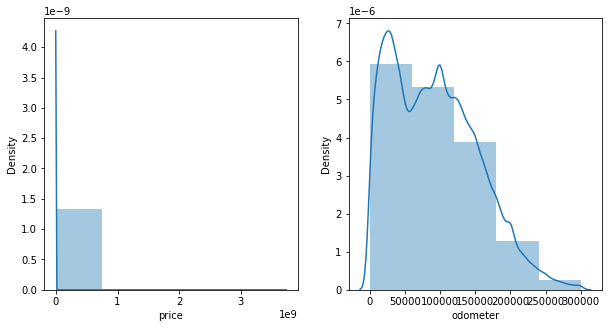

In [57]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(df1['price'],bins=5)
plt.subplot(122)
sns.distplot(df1['odometer'],bins=5)

<AxesSubplot:xlabel='odometer', ylabel='price'>

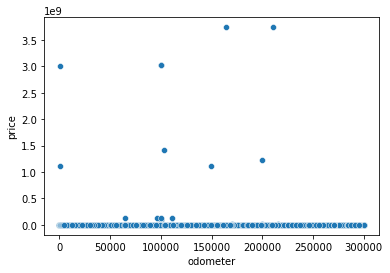

In [58]:
sns.scatterplot(data=df1,x='odometer',y='price')

interesting, i thought that as the odometer increased, price would decrease, but there doesn't seem to be a trend

<AxesSubplot:xlabel='year', ylabel='price'>

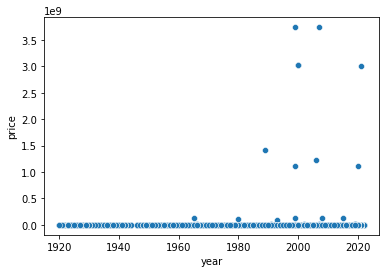

In [59]:
sns.scatterplot(data=df1,x='year',y='price')

same thing, as the year increase i would think price would too, unless we have too many outliers

Let's take a different route, maybe with the us_region to see if we can find anything

In [60]:
cleaned=df1[~df1.isnull().any(axis=1)]
cleaned.sample(15)

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,...,size,type,color,state,lat,long,posting_date,state,us_region,division
311406,detroit metro,15995,2015.0,toyota,rav4 xle awd,like new,4 cylinders,gas,87000.0,clean,...,mid-size,suv,black,MI,42.702300,-82.668800,2021-04-30T10:08:37-0400,Michigan,Midwest,East North Central
308669,battle creek,8900,2014.0,ford,fusion se,good,4 cylinders,gas,124000.0,clean,...,mid-size,sedan,grey,MI,42.333804,-85.154428,2021-04-20T11:44:57-0400,Michigan,Midwest,East North Central
44653,cape cod / islands,6999,2011.0,toyota,camery,good,4 cylinders,gas,119000.0,clean,...,mid-size,sedan,blue,MA,41.641700,-70.623000,2021-04-14T13:51:58-0400,Massachusetts,Northeast,New England
19358,jacksonville,31995,2016.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,114621.0,clean,...,full-size,truck,blue,FL,30.207288,-81.738969,2021-04-29T17:10:09-0400,Florida,South,South Atlantic
91024,eugene,3785,2010.0,chrysler,sebring,excellent,4 cylinders,gas,175221.0,clean,...,compact,sedan,silver,OR,44.052780,-123.128308,2021-04-22T17:04:10-0700,Oregon,West,Pacific
7117,tucson,7000,1989.0,ford,f-150,good,6 cylinders,gas,129800.0,clean,...,full-size,truck,white,AZ,32.359316,-111.098557,2021-04-27T10:29:09-0700,Arizona,West,Mountain
235457,hartford,8495,2012.0,ford,fusion se,good,6 cylinders,gas,82000.0,clean,...,full-size,sedan,custom,CT,42.595900,-72.226700,2021-04-17T07:49:38-0400,Connecticut,Northeast,New England
319622,lansing,7500,1999.0,pontiac,grand am gt,excellent,6 cylinders,gas,59620.0,clean,...,compact,coupe,white,MI,42.679700,-84.577200,2021-04-23T17:33:33-0400,Michigan,Midwest,East North Central
65777,albany,1990,2001.0,ram,1500,good,6 cylinders,gas,114000.0,clean,...,sub-compact,pickup,blue,NY,42.700300,-73.857500,2021-04-21T12:52:09-0400,New York,Northeast,Middle Atlantic
405851,memphis,22959,2014.0,lexus,is 350,new,6 cylinders,gas,76062.0,clean,...,compact,sedan,grey,TN,35.224574,-89.926689,2021-04-21T08:26:06-0500,Tennessee,South,East South Central


In [61]:
rt=df1[["us_region", "type"]]
rt

,us_region,type
1,West,mini-van
3,West,hatchback
4,West,other
5,West,coupe
6,West,pickup
...,...,...
426855,West,sedan
426856,West,sedan
426857,West,hatchback
426858,West,sedan


In [62]:
rt.us_region.unique()

array(['West', 'South', 'Northeast', 'Midwest'], dtype=object)

In [63]:
rts=rt[rt['us_region']=='South']
south=rts.type.value_counts()
south

sedan          25105
suv            20987
pickup         14716
truck          12837
other           6443
coupe           6425
hatchback       4946
van             3386
convertible     2737
wagon           2612
mini-van        1309
bus              263
offroad          195
Name: type, dtype: int64

In [64]:
rtw=rt[rt['us_region']=='West']
west=rtw.type.value_counts()
west

sedan          24226
suv            22602
truck          14669
pickup         12324
other           5116
hatchback       4986
coupe           4828
wagon           3624
van             2949
convertible     2129
mini-van         997
offroad          367
bus              132
Name: type, dtype: int64

In [65]:
rtne=rt[rt['us_region']=='Northeast']
northeast=rtne.type.value_counts()
northeast

sedan          14156
suv            11820
pickup          6418
truck           4687
other           4050
coupe           3342
hatchback       2984
wagon           2175
van             1437
convertible     1410
mini-van         776
bus              157
offroad           61
Name: type, dtype: int64

In [66]:
rtmw=rt[rt['us_region']=='Midwest']
midwest=rtmw.type.value_counts()
midwest

suv            18273
sedan          17101
truck           9446
pickup          8837
coupe           3977
other           3788
hatchback       3146
van             2356
wagon           1873
convertible     1720
mini-van        1370
bus              183
offroad           90
Name: type, dtype: int64

<AxesSubplot:>

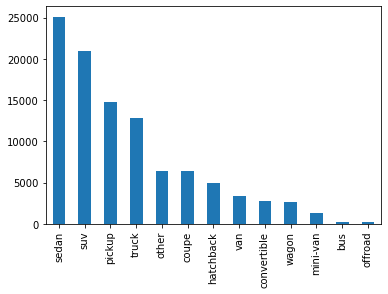

In [67]:
south.plot(kind='bar')


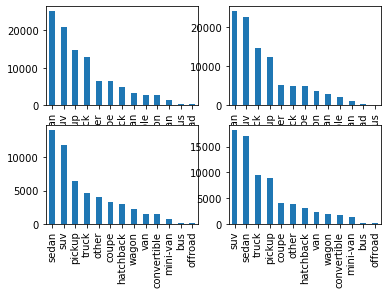

In [68]:
#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
df_list = [south,west,northeast,midwest]
fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c],kind='bar')
        count+=1

I want to try and plot them all on the same one, let's try it

In [69]:
west1=west.to_frame(name='west')

In [70]:
west1.rename(columns={'index':'type'},inplace=True)

In [71]:
west1

,west
sedan,24226
suv,22602
truck,14669
pickup,12324
other,5116
hatchback,4986
coupe,4828
wagon,3624
van,2949
convertible,2129


In [72]:
south1=south.to_frame(name='south')

In [73]:
south1

,south
sedan,25105
suv,20987
pickup,14716
truck,12837
other,6443
coupe,6425
hatchback,4946
van,3386
convertible,2737
wagon,2612


In [74]:
z=pd.merge(south1,west1,how='outer',left_index=True,right_index=True)

In [75]:
z

,south,west
bus,263,132
convertible,2737,2129
coupe,6425,4828
hatchback,4946,4986
mini-van,1309,997
offroad,195,367
other,6443,5116
pickup,14716,12324
sedan,25105,24226
suv,20987,22602


In [76]:
z.T

,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,suv,truck,van,wagon
south,263,2737,6425,4946,1309,195,6443,14716,25105,20987,12837,3386,2612
west,132,2129,4828,4986,997,367,5116,12324,24226,22602,14669,2949,3624


<AxesSubplot:>

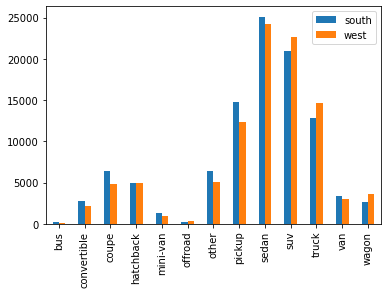

In [77]:
z.plot(kind='bar')

<AxesSubplot:>

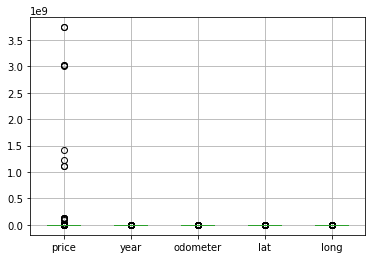

In [78]:
df1.boxplot()

Let's play with manufacturer stuff

In [79]:
df1.manufacturer.unique()

array(['honda', 'chevrolet', 'mercedes-benz', 'ram', 'nissan',
       'volkswagen', 'gmc', 'ford', 'bmw', 'cadillac', 'subaru', 'dodge',
       'jeep', 'tesla', 'mini', 'fiat', nan, 'toyota', 'rover', 'kia',
       'pontiac', 'chrysler', 'hyundai', 'buick', 'acura', 'mazda',
       'lincoln', 'mitsubishi', 'audi', 'mercury', 'lexus', 'porsche',
       'infiniti', 'jaguar', 'ferrari', 'alfa-romeo', 'volvo',
       'harley-davidson', 'saturn', 'datsun', 'aston-martin',
       'land rover', 'morgan', 'porche'], dtype=object)

In [80]:
df1.manufacturer.value_counts()

ford               63035
chevrolet          48540
toyota             30593
honda              19229
nissan             16872
jeep               16701
ram                15906
gmc                15074
bmw                13327
dodge              12088
mercedes-benz       9907
hyundai             9106
subaru              8743
volkswagen          8441
lexus               7551
kia                 7272
audi                6997
cadillac            6351
chrysler            5555
acura               5543
buick               5039
mazda               4907
infiniti            4428
lincoln             3998
volvo               3215
mitsubishi          3005
mini                2280
pontiac             2193
rover               1920
jaguar              1882
porsche             1270
mercury             1083
saturn              1056
tesla                837
alfa-romeo           829
fiat                 758
harley-davidson      135
ferrari              108
datsun                59
morgan                40


In [81]:
df_price_manufacturer=df1[["manufacturer", "price"]]
means = df_price_manufacturer.groupby('manufacturer')['price'].mean()
means=pd.DataFrame(means)
means.head()

,price
manufacturer,
acura,21494.232185
alfa-romeo,29435.794934
aston-martin,61136.619048
audi,25447.925540
bmw,29847.724694


In [82]:
means=means.sort_values('price')
means

,price
manufacturer,
mercury,6102.381348
saturn,7086.758523
pontiac,8422.935705
chrysler,11454.392799
honda,11795.035623
hyundai,12184.888755
fiat,12552.195251
kia,12818.039054
mazda,13590.515386


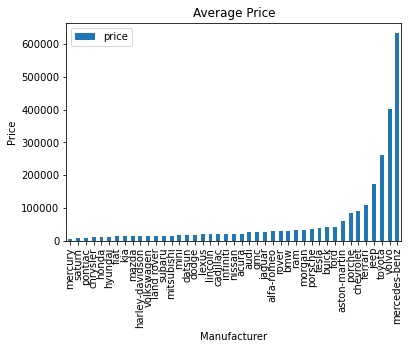

In [83]:
ax = means.plot(kind='bar')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Price')
ax.set_title('Average Price')
plt.show()

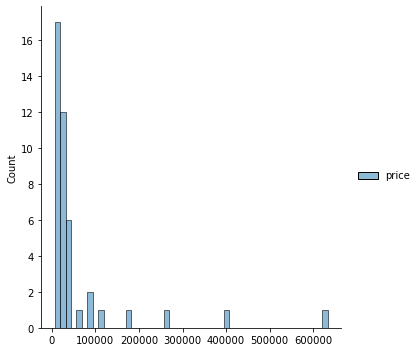

In [84]:
sns.displot(means,bins=50)
plt.show()

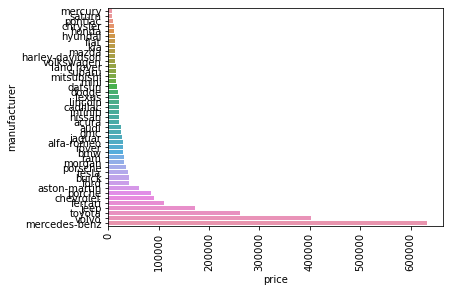

In [85]:
sns.barplot(y=means.index, x=means.price)

plt.xticks(rotation="vertical")

plt.show()

In [86]:
df1

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,...,size,type,color,state,lat,long,posting_date,state,us_region,division
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,...,full-size,mini-van,blue,AZ,34.727929,-112.015915,2021-05-04T09:40:28-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,...,NaN,hatchback,black,AZ,33.779214,-84.411811,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,...,NaN,other,black,AZ,33.779214,-84.411811,2021-05-04T06:06:54-0700,Arizona,West,Mountain
5,flagstaff / sedona,27590,2011.0,mercedes-benz,cl-class cl 550,good,8 cylinders,gas,61445.0,clean,...,NaN,coupe,silver,AZ,33.779214,-84.411811,2021-05-04T06:07:06-0700,Arizona,West,Mountain
6,flagstaff / sedona,31990,2017.0,ram,1500 crew cab express pickup,good,8 cylinders,gas,15498.0,clean,...,NaN,pickup,silver,AZ,33.779214,-84.411811,2021-05-04T06:06:56-0700,Arizona,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,NaN,sedan,red,WY,33.786500,-84.445400,2021-04-04T03:21:31-0600,Wyoming,West,Mountain
426856,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,...,NaN,sedan,red,WY,33.786500,-84.445400,2021-04-04T03:21:29-0600,Wyoming,West,Mountain
426857,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,...,NaN,hatchback,white,WY,33.779214,-84.411811,2021-04-04T03:21:17-0600,Wyoming,West,Mountain
426858,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,NaN,sedan,silver,WY,33.786500,-84.445400,2021-04-04T03:21:11-0600,Wyoming,West,Mountain


Let's save the Dataframe for next step